quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64
Apmokymo duomenų poaibio įvestys:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
12              8.5              0.28         0.56             1.8      0.092   
758             9.9              0.32         0.56             2.0      0.073   
636             8.9              0.31         0.36             2.6      0.056   
1109            6.6              0.88         0.04             2.2      0.066   
743             7.6              0.42         0.25             3.9      0.104   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
12                   35.0                 103.0  0.99690  3.30       0.75   
758                   3.0                   8.0  0.99534  3.15       0.73   
636                  10.0                  39.0  0.99562  3.40       0.69   
1109                 12.0                  20.0  0.99636  3.53       0.56   
743   

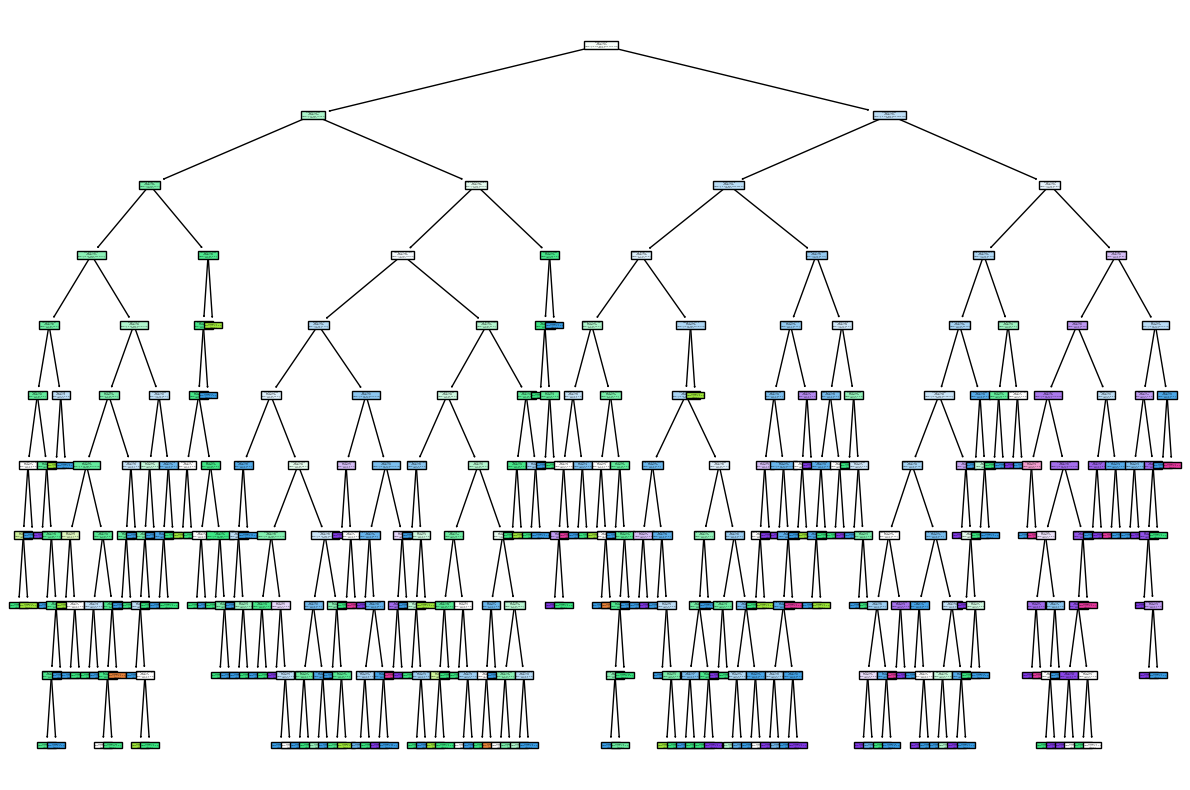

Accuracy: 0.5458515283842795
MAE: 0.5021834061135371
Confusion Matrix:
 [[ 1  2  2  1  0]
 [ 8 64 22  2  0]
 [ 3 33 45 17  1]
 [ 0  1 10 15  0]
 [ 0  0  0  2  0]]


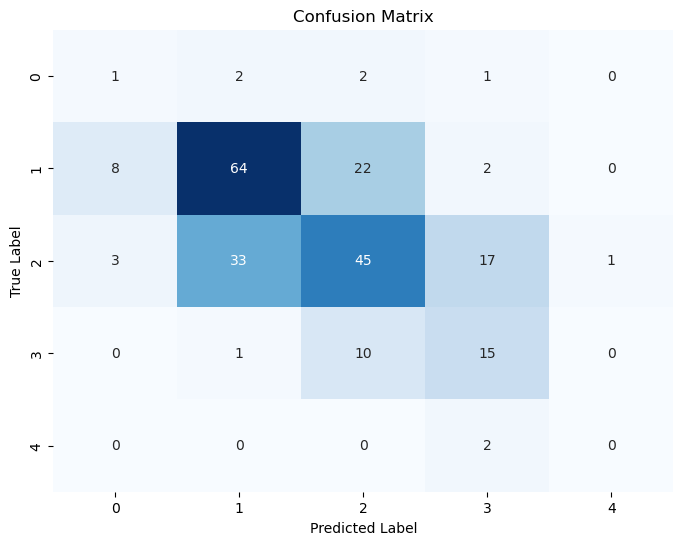

Max Depth: 3, Accuracy: 0.5807860262008734, Time: 0.004216194152832031 seconds
Max Depth: 4, Accuracy: 0.6157205240174672, Time: 0.004065752029418945 seconds
Max Depth: 5, Accuracy: 0.6069868995633187, Time: 0.004567146301269531 seconds
Max Depth: 6, Accuracy: 0.5589519650655022, Time: 0.005403757095336914 seconds
MAE: 0.4104803493449782
Confusion Matrix:
 [[ 0  0  0  0  0  0]
 [ 0  0  4  2  0  0]
 [ 0  0 74 22  0  0]
 [ 1  0 34 57  7  0]
 [ 0  1  1 12 12  0]
 [ 0  0  0  1  1  0]]


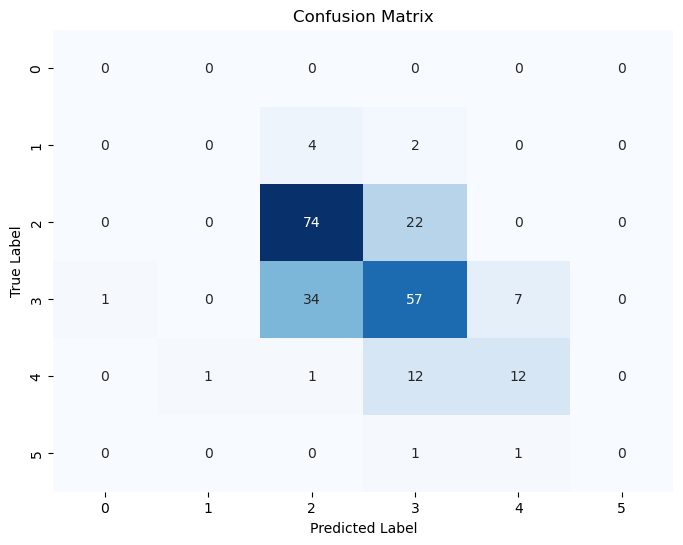

Number of Trees: 3, Accuracy: 0.5851528384279476, MAE: 0.4978165938864629
Number of Trees: 4, Accuracy: 0.62882096069869, MAE: 0.4148471615720524
Number of Trees: 5, Accuracy: 0.6244541484716157, MAE: 0.4104803493449782
Number of Trees: 6, Accuracy: 0.6375545851528385, MAE: 0.38427947598253276
Number of Trees: 7, Accuracy: 0.6550218340611353, MAE: 0.36681222707423583
Number of Trees: 8, Accuracy: 0.62882096069869, MAE: 0.39737991266375544
Number of Trees: 9, Accuracy: 0.6462882096069869, MAE: 0.38427947598253276


In [11]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import time

# 1. Pasirinkite duomenų rinkinį kuriam sudarysite sprendimų medį.
data = pd.read_csv("WineQT.csv")

# 2. Kaip sprendimų medžio išvestį pasirinkite prognozuojamą atributą
# Pasirinkime 'quality' atributą
X = data.drop('quality', axis=1)
Id = data = data.drop('Id', axis=1)
y = data['quality']

# Check the unique values of the quality column
print(y.value_counts())

# 3. Turimą duomenų rinkinį suskaidykite į apmokymo bei testavimo poaibius.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Suskaidykite duomenų poaibius į įvestis ir išvestis.
print("Apmokymo duomenų poaibio įvestys:")
print(X_train.head())
print("\nApmokymo duomenų poaibio išvestis:")
print(y_train.head())
print ("///////////////////////////////////////////////////////////////////////////////////////////////////////////")
print("\nTestavimo duomenų poaibio įvestys:")
print(X_test.head())
print("\nTestavimo duomenų poaibio išvestis:")
print(y_test.head())

# 5. Naudojant apmokymo duomenų rinkinį, sudarykite sprendimų medį.
# Sudarykime sprendimų medį naudojant DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)

# Gauti sprendimų medžio gylį
depth = clf.get_depth()
print("Decision tree depth:", depth)

# 6. Grafiškai atvaizduokite gautą sprendimų medį.
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.savefig("Decision_Tree.pdf", format='pdf')
plt.savefig("Decision_Tree.png")
plt.show()




# 7. Ištestuokite sudaryta sprendimų medį naudojant testavimo duomenis
# ir apskaičiuokite prognozavimo tikslumą/paklaidą.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Accuracy:", accuracy)
print("MAE:", mae)
print("Confusion Matrix:\n", conf_matrix)


# Print the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 8. Keičiant maksimalų medžio gylį, eksperimentiniu būdu išmatuokite
# skirtingų gylių (3-4 variacijos) medžių formavimo trukmę bei gaunamą tikslumą.
depths = [3, 4, 5, 6]
for depth in depths:
    start_time = time.time()  # Pradžios laiko žymė
    clf_depth = DecisionTreeClassifier(max_depth=depth)
    clf_depth.fit(X_train, y_train)
    end_time = time.time()  # Pabaigos laiko žymė
    y_pred_depth = clf_depth.predict(X_test)
    accuracy_depth = accuracy_score(y_test, y_pred_depth)
    print(f"Max Depth: {depth}, Accuracy: {accuracy_depth}, Time: {end_time - start_time} seconds")

# 9. Naudojant tą patį apmokymo ir testavimo duomenų imties pasiskirstymą
# kaip ir formuojant sprendimų medį, suformuokite atsitiktinį mišką kurį sudaro 5 medžiai.
rf = RandomForestClassifier(n_estimators=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf_n = rf.predict(X_test)
accuracy_rf_n = accuracy_score(y_test, y_pred_rf_n)
conf_matrix_forest = confusion_matrix(y_test, y_pred_rf_n)
mae_forest = mean_absolute_error(y_test, y_pred_rf_n)

print("MAE:", mae_forest)
print("Confusion Matrix:\n", conf_matrix_forest)

# Print the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_forest, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 10. Keičiant mišką sudarančių medžių kiekį [3-9], nustatykite geriausius rezultatus
# pateikiantį atsitiktinį mišką.
num_trees = [3, 4, 5, 6, 7, 8, 9]
for n_trees in num_trees:
    rf_n = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf_n.fit(X_train, y_train)
    y_pred_rf_n = rf_n.predict(X_test)
    accuracy_rf_n = accuracy_score(y_test, y_pred_rf_n)
    mae_forest_treex = mean_absolute_error(y_test, y_pred_rf_n)
    print(f"Number of Trees: {n_trees}, Accuracy: {accuracy_rf_n}, MAE: {mae_forest_treex}")

# 11. Palyginkite pirminio sprendimų medžio ir atsitiktinio miško gautus rezultatus.
# Šiame punkte reikėtų palyginti gautus rezultatus, kadangi tai daugiau susiję su analize, negu su kodu, todėl neįtraukiau jo į kodą.

